In [55]:
import streamlit as st
import pandas as pd
import base64
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import yfinance as yf


In [60]:
def load_data():
    url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
    html = pd.read_html(url, header = 0)
    df = html[0]
    return df

In [59]:
df= load_data()
df

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
499,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
501,ZION,Zions Bancorporation,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


In [62]:
sector_uniq = df['GICS Sector'].unique()
sector_uniq


array(['Industrials', 'Health Care', 'Information Technology',
       'Communication Services', 'Consumer Staples',
       'Consumer Discretionary', 'Utilities', 'Financials', 'Materials',
       'Real Estate', 'Energy'], dtype=object)

In [63]:
len(sector_uniq)

11

In [64]:
sector_uniq.describe()

AttributeError: 'numpy.ndarray' object has no attribute 'describe'

In [23]:
sector = df.groupby('GICS Sector')
sector.first()

,Symbol,Security,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
GICS Sector,,,,,,,
Communication Services,ATVI,Activision Blizzard,Interactive Home Entertainment,"Santa Monica, California",2015-08-31,718877,2008
Consumer Discretionary,AAP,Advance Auto Parts,Automotive Retail,"Raleigh, North Carolina",2015-07-09,1158449,1932
Consumer Staples,ADM,ADM,Agricultural Products,"Chicago, Illinois",1957-03-04,7084,1902
Energy,APA,APA Corporation,Oil & Gas Exploration & Production,"Houston, Texas",1997-07-28,1841666,1954
Financials,AFL,Aflac,Life & Health Insurance,"Columbus, Georgia",1999-05-28,4977,1955
Health Care,ABT,Abbott,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
Industrials,MMM,3M,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
Information Technology,ACN,Accenture,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
Materials,APD,Air Products and Chemicals,Industrial Gases,"Allentown, Pennsylvania",1985-04-30,2969,1940


In [24]:
sector.describe()

CIK                                                   \
                       count          mean            std      min        25%   
GICS Sector                                                                     
Communication Services  25.0  1.081723e+06  528412.979118  18926.0  732717.00   
Consumer Discretionary  56.0  8.620841e+05  454741.225170  27419.0  759791.50   
Consumer Staples        34.0  4.398704e+05  588198.855892   7084.0   28584.75   
Energy                  23.0  8.423255e+05  640873.249366   4447.0   97594.00   
Financials              65.0  6.303862e+05  536611.140408   4962.0   70858.00   
Health Care             65.0  8.444450e+05  546653.710569   1800.0  313616.00   
Industrials             70.0  6.463865e+05  579974.644305   4281.0   76590.50   
Information Technology  76.0  9.277535e+05  505769.418012   2488.0  764360.50   
Materials               29.0  8.433121e+05  687449.351971   2969.0   73309.00   
Real Estate             30.0  9.530729e+05  379707.226998  34903.0  885852.50   
Utilities               30.0  8.457124e+05  460276.348204   4904.0  737178.50   

                                                          
                              50%         75%        max  
GICS Sector                                               
Communication Services  1091667.0  1564708.00  1754301.0  
Consumer Discretionary   918562.5  1130953.25  1590895.0  
Consumer Staples          78950.0   898812.00  1679273.0  
Energy                  1035002.0  1447738.50  1841666.0  
Financials               759944.0  1113169.00  1601712.0  
Health Care              885725.0  1110803.00  1932393.0  
Industrials              725894.5  1055742.75  1783180.0  
Information Technology  1007754.5  1344081.75  1730168.0  
Materials                916076.0  1396009.00  1755672.0  
Real Estate             1027311.5  1069002.75  1705696.0  
Utilities                898492.5  1043948.50  1868275.0

In [65]:
sector.get_group('Health Care')

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
12,A,Agilent Technologies,Health Care,Health Care Equipment,"Santa Clara, California",2000-06-05,1090872,1999
18,ALGN,Align Technology,Health Care,Health Care Supplies,"Tempe, Arizona",2017-06-19,1097149,1997
36,ABC,AmerisourceBergen,Health Care,Health Care Distributors,"Conshohocken, Pennsylvania",2001-08-30,1140859,1985
...,...,...,...,...,...,...,...,...
474,VTRS,Viatris,Health Care,Pharmaceuticals,"Pittsburgh, Pennsylvania",2004-04-23,1792044,1961
483,WAT,Waters Corporation,Health Care,Health Care Distributors,"Milford, Massachusetts",2002-01-02,1000697,1958
487,WST,West Pharmaceutical Services,Health Care,Health Care Supplies,"Exton, Pennsylvania",2020-05-22,105770,1923
500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


In [66]:

data = yf.download(
        tickers = list(df.Symbol),
        period = "ytd",
        interval = "1d",
        group_by = 'ticker',
        auto_adjust = True,
        prepost = True,
        threads = True,
        proxy = None
    )


[*********************100%***********************]  503 of 503 completed

2 Failed downloads:
- BF.B: No data found for this date range, symbol may be delisted
- BRK.B: No data found, symbol may be delisted


In [28]:
data

CNC                                            \
                          Open       High        Low      Close   Volume   
Date                                                                       
2023-01-03 00:00:00  82.000000  83.610001  78.860001  79.739998  6674100   
2023-01-04 00:00:00  80.190002  80.760002  78.910004  79.459999  5149000   
2023-01-05 00:00:00  78.709999  79.110001  76.709999  77.260002  5882300   
2023-01-06 00:00:00  77.750000  79.050003  77.050003  78.660004  3882900   
2023-01-09 00:00:00  78.889999  79.980003  77.470001  77.589996  4301900   
2023-01-10 00:00:00  77.730003  77.839996  75.540001  76.120003  3030900   
2023-01-11 00:00:00  76.110001  78.449997  75.860001  78.440002  2892400   
2023-01-12 00:00:00  78.480003  78.970001  76.919998  78.180000  3503500   
2023-01-13 00:00:00  77.730003  79.070000  76.870003  77.040001  3195500   
2023-01-17 00:00:00  77.440002  78.349998  76.669998  76.739998  3302800   
2023-01-18 00:00:00  76.739998  76.900002  74.970001  75.089996  3091200   
2023-01-19 00:00:00  75.370003  76.379997  75.099998  75.860001  2486100   
2023-01-20 00:00:00  75.860001  76.209999  74.970001  76.150002  2981900   
2023-01-23 00:00:00  76.389999  76.970001  75.550003  75.790001  2896800   
2023-01-24 00:00:00  75.000000  76.250000  74.769997  75.760002  3198200   
2023-01-25 00:00:00  75.180000  77.389999  75.180000  76.050003  4033900   
2023-01-26 00:00:00  76.260002  77.209999  76.040001  76.610001  2726200   
2023-01-27 00:00:00  76.629997  76.830002  74.900002  75.250000  2892400   
2023-01-30 00:00:00  75.370003  76.019997  74.589996  74.699997  3782300   
2023-01-31 00:00:00  75.160004  77.389999  75.160004  76.239998  5579700   
2023-02-01 00:00:00  76.040001  76.300003  74.959999  75.139999  3926700   
2023-02-02 00:00:00  74.599998  74.599998  71.940002  72.570000  9686000   
2023-02-03 00:00:00  73.220001  73.660004  70.800003  71.010002  5098500   
2023-02-06 00:00:00  71.190002  71.690002  70.599998  71.010002  4760000   
2023-02-07 00:00:00  70.000000  71.410004  68.730003  70.980003  6669100   
2023-02-08 00:00:00  70.610001  73.919998  70.550003  72.919998  6636100   
2023-02-09 00:00:00  73.089996  73.570000  71.349998  71.559998  4784100   
2023-02-10 00:00:00  72.910004  73.220001  71.419998  72.739998  4949300   
2023-02-13 00:00:00  72.989998  73.400002  72.120003  73.080002  4695300   
2023-02-14 00:00:00  73.010002  74.440002  72.790001  73.379997  3929600   
2023-02-15 00:00:00  72.809998  73.300003  72.239998  73.099998  3882800   
2023-02-16 00:00:00  72.800003  73.690002  72.430000  73.010002  3716600   
2023-02-17 00:00:00  72.750000  73.779999  72.629997  73.360001  2700400   
2023-02-21 00:00:00  73.120003  73.419998  72.220001  72.269997  3557400   
2023-02-22 00:00:00  72.410004  72.709999  71.839996  72.279999  2227100   
2023-02-23 00:00:00  71.989998  72.320000  70.910004  71.669998  3369600   
2023-02-24 00:00:00  71.680000  71.680000  70.129997  70.279999  2960400   
2023-02-27 00:00:00  70.879997  70.970001  69.980003  70.089996  2832100   
2023-02-28 00:00:00  69.849998  70.050003  68.059998  68.400002  4185000   
2023-03-01 00:00:00  67.870003  69.080002  67.580002  68.510002  3447500   
2023-03-02 00:00:00  68.330002  69.000000  67.419998  68.589996  3161200   
2023-03-03 00:00:00  68.769997  69.129997  68.000000  69.070000  2921000   
2023-03-06 00:00:00  69.029999  69.820000  68.790001  68.959999  3273900   
2023-03-07 00:00:00  69.190002  69.230003  67.389999  67.949997  3646900   
2023-03-08 00:00:00  66.559998  67.470001  66.389999  66.900002  3686500   
2023-03-09 00:00:00  67.169998  67.360001  65.129997  65.540001  3607600   
2023-03-10 00:00:00  65.419998  66.349998  64.820000  65.099998  2948500   
2023-03-13 00:00:00  64.800003  65.870003  63.990002  64.169998  2883200   
2023-03-14 00:00:00  64.790001  65.139999  62.880001  63.340000  4032900   
2023-03-15 00:00:00  62.730000  63.840000  62.380001  63.540001  3744600   

In [67]:
data['AAPL']

,Open,High,Low,Close,Volume
Date,,,,,
2023-01-03 00:00:00,130.081382,130.700432,123.980696,124.879326,112117500
2023-01-04 00:00:00,126.696557,128.463863,124.889319,126.167366,89113600
2023-01-05 00:00:00,126.936183,127.575207,124.569801,124.829399,80962700
2023-01-06 00:00:00,125.817904,130.091371,124.699609,129.422394,87754700
2023-01-09 00:00:00,130.271103,133.206624,129.691986,129.951584,70790800
2023-01-10 00:00:00,130.061416,131.059891,127.924679,130.530701,63896200
2023-01-11 00:00:00,131.049908,133.306458,130.261119,133.286499,69458900
2023-01-12 00:00:00,133.675904,134.055314,131.239621,133.206619,71379600
2023-01-13 00:00:00,131.828716,134.714310,131.459285,134.554550,57809700


In [31]:
df = pd.DataFrame(data['AAPL'].Close)
df['Date'] = df.index
    

In [68]:
df

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
499,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
501,ZION,Zions Bancorporation,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


Text(0, 0.5, 'Closing Price')

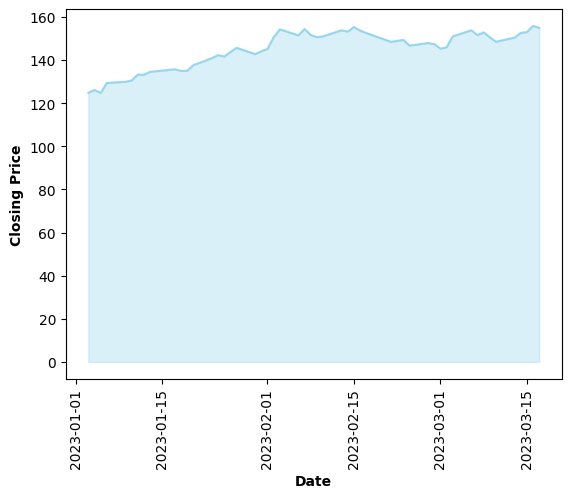

In [35]:
plt.fill_between(df.Date, df.Close, color='skyblue', alpha=0.3)
plt.plot(df.Date, df.Close, color='skyblue', alpha=0.8)
plt.xticks(rotation=90)
plt.xlabel('Date', fontweight='bold')
plt.ylabel('Closing Price', fontweight='bold')

In [39]:
#representing custom function

# Plot Closing Price of Query Symbol
def price_plot(symbol):
    df = pd.DataFrame(data[symbol].Close)
    df['Date'] = df.index
    plt.fill_between(df.Date, df.Close, color='skyblue', alpha=0.3)
    plt.plot(df.Date, df.Close, color='skyblue', alpha=0.8)
    plt.xticks(rotation=90)
    plt.title(symbol, fontweight='bold')
    plt.xlabel('Date', fontweight='bold')
    plt.ylabel('Closing Price', fontweight='bold')
    return plt.show()

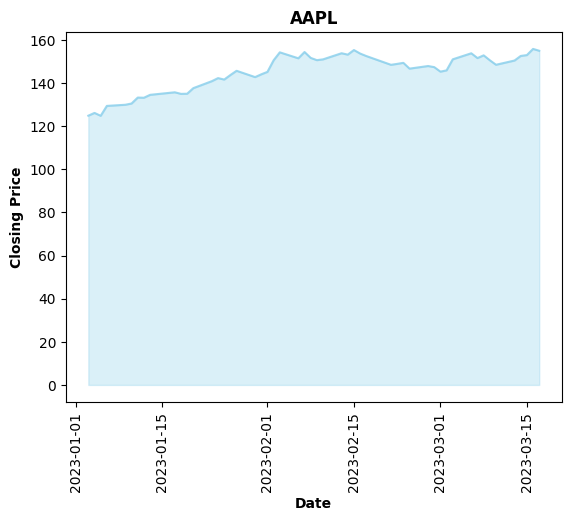

In [40]:
price_plot('AAPL')

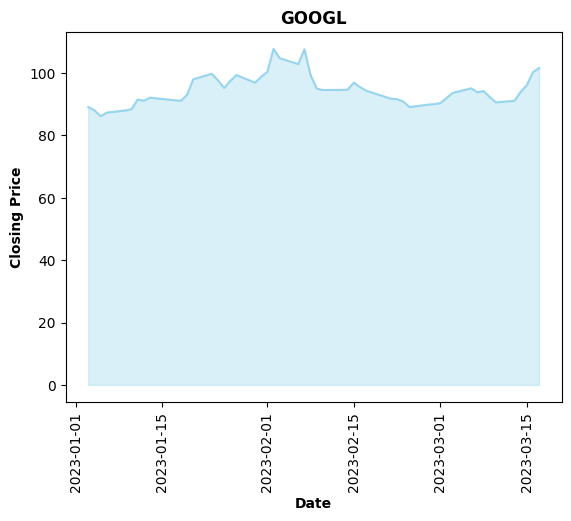

In [41]:
price_plot('GOOGL')

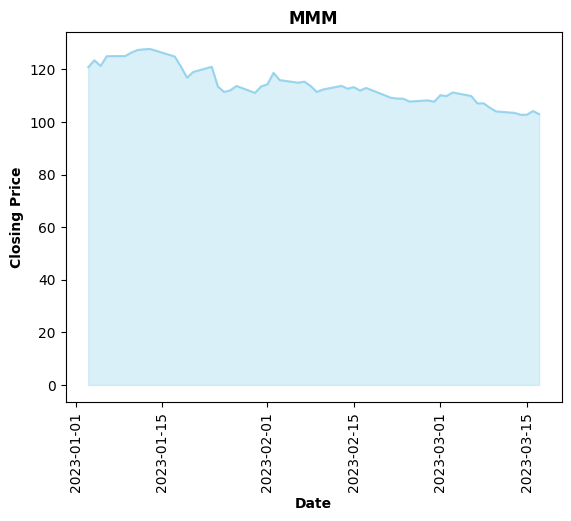

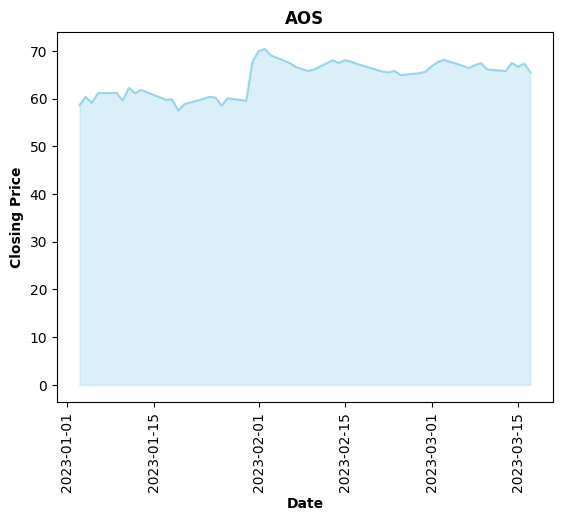

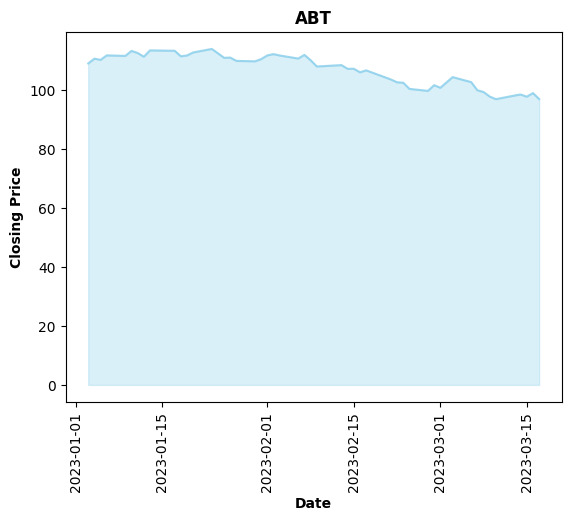

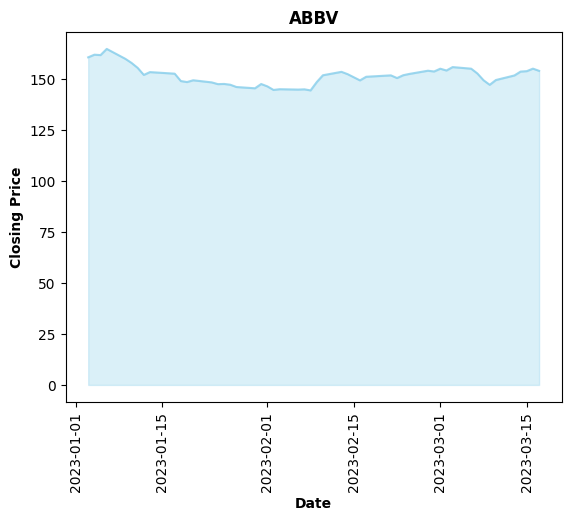

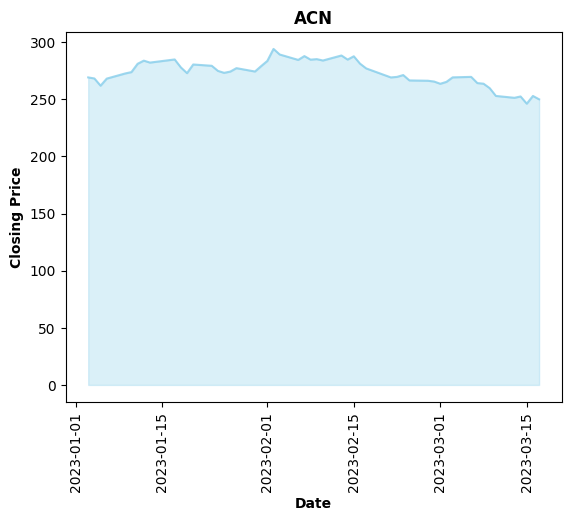

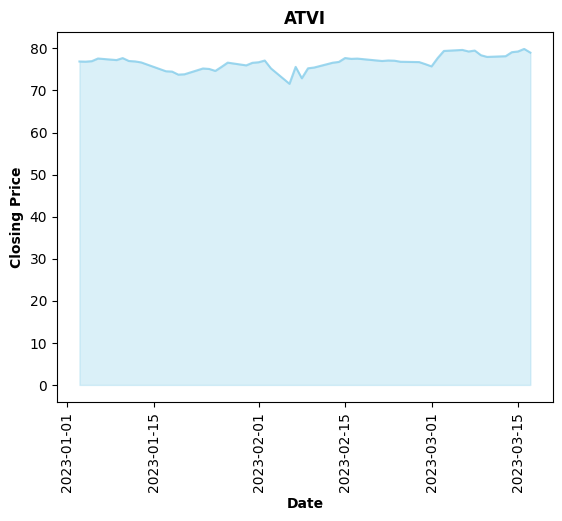

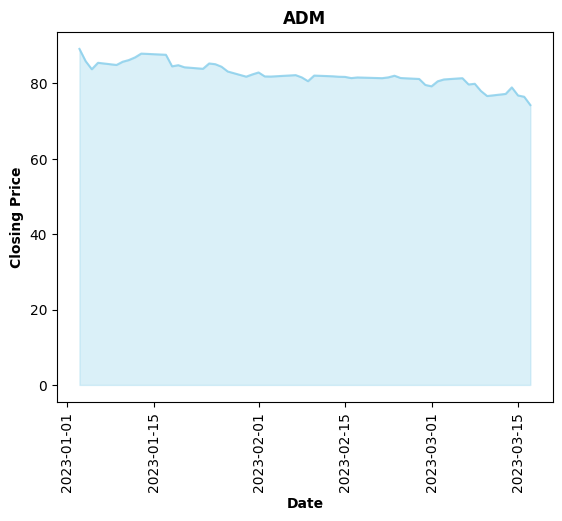

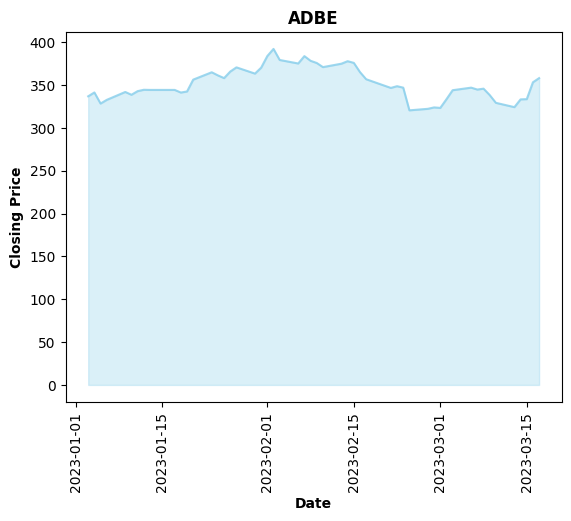

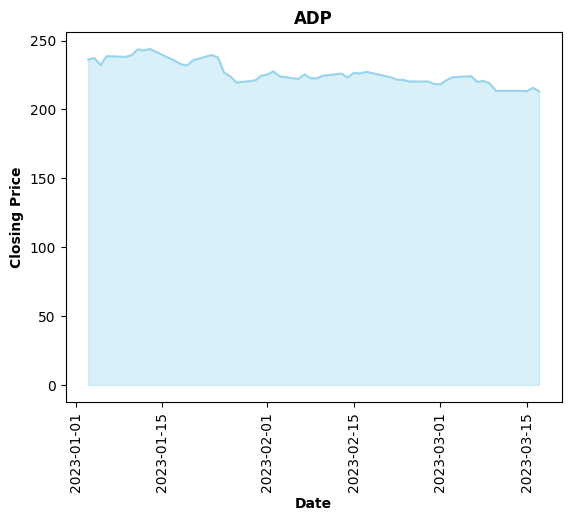

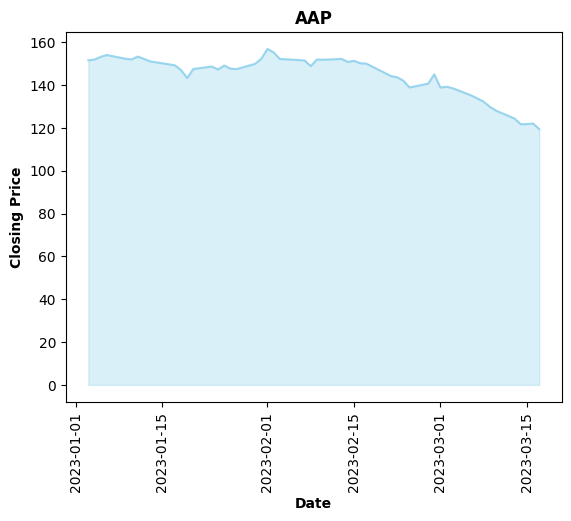

In [70]:
for i in list(df.Symbol)[:10]:
    price_plot(i)